## Explore a retail data set from Kaggle.

Link: https://www.kaggle.com/manjeetsingh/retaildataset

You are provided with historical sales data for 45 stores located in different regions - each store contains a number of departments. The company also runs several promotional markdown events throughout the year. These markdowns precede prominent holidays, the four largest of which are the Super Bowl, Labor Day, Thanksgiving, and Christmas. The weeks including these holidays are weighted five times higher in the evaluation than non-holiday weeks.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

**Import sales data**

In [2]:
df = pd.read_csv('./Retail-sales.csv')

**Describe data set**

In [3]:
df.describe()

,Store,Dept,Weekly_Sales,store_size
count,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,136727.915739
std,12.785297,30.492054,22711.183519,60980.583328
min,1.000000,1.000000,-4988.940000,34875.000000
25%,11.000000,18.000000,2079.650000,93638.000000
50%,22.000000,37.000000,7612.030000,140167.000000
75%,33.000000,74.000000,20205.852500,202505.000000
max,45.000000,99.000000,693099.360000,219622.000000


In [4]:
df.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'store_type',
       'store_size'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 7 columns):
Store           421570 non-null int64
Dept            421570 non-null int64
Date            421570 non-null object
Weekly_Sales    421570 non-null float64
IsHoliday       421570 non-null bool
store_type      421570 non-null object
store_size      421570 non-null int64
dtypes: bool(1), float64(1), int64(3), object(2)
memory usage: 19.7+ MB


In [6]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,store_type,store_size
0,1,1,05/02/2010,24924.50,False,A,151315
1,1,1,12/02/2010,46039.49,True,A,151315
2,1,1,19/02/2010,41595.55,False,A,151315
3,1,1,26/02/2010,19403.54,False,A,151315
4,1,1,05/03/2010,21827.90,False,A,151315


**What if we change the index to be the date column?**

In [7]:
df.index = df['Date']
del df['Date']

In [8]:
df.head()

,Store,Dept,Weekly_Sales,IsHoliday,store_type,store_size
Date,,,,,,
05/02/2010,1,1,24924.50,False,A,151315
12/02/2010,1,1,46039.49,True,A,151315
19/02/2010,1,1,41595.55,False,A,151315
26/02/2010,1,1,19403.54,False,A,151315
05/03/2010,1,1,21827.90,False,A,151315


**Plot weekly sales trend**

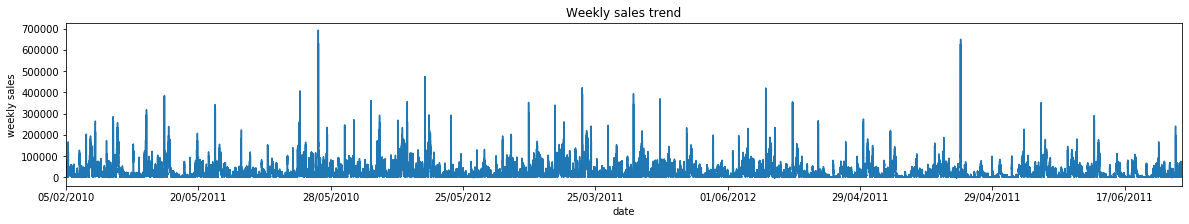

In [9]:
plt.figure(figsize=(20,3))
df['Weekly_Sales'].plot()
plt.title('Weekly sales trend')
plt.ylabel('weekly sales')
plt.xlabel('date')
plt.show()

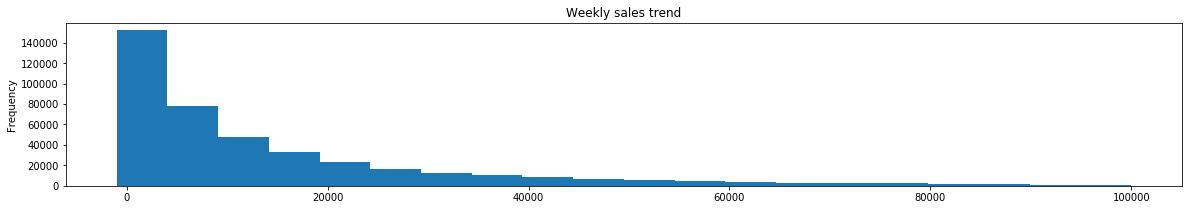

In [10]:
plt.figure(figsize=(20,3))
df['Weekly_Sales'].plot(kind='hist', bins=20, range=(-1000,100000) )
plt.title('Weekly sales trend')
plt.show()

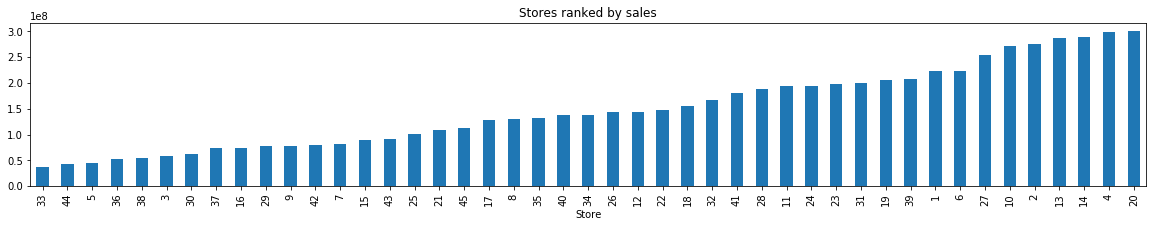

In [11]:
plt.figure(figsize=(20,3))
sales_by_store = df.groupby("Store")['Weekly_Sales'].sum().sort_values()
sales_by_store.plot(kind='bar')
plt.title('Stores ranked by sales')
plt.show()

C:\Tools\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\hist.py:62: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


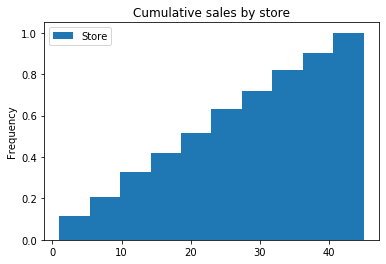

In [12]:

df.plot(y="Store", kind='hist', cumulative=True, normed=True)
plt.title('Cumulative sales by store')
plt.show()

**Explore sales trend by quarter**

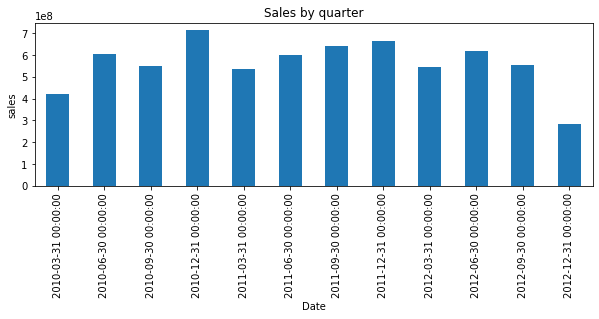

In [13]:
# time-series: convert date index to time-series and plot sales by quarter
plt.figure(figsize=(10,3))
df.index = pd.to_datetime(df.index)
sales_by_month = df['Weekly_Sales'].resample('Q').sum()
sales_by_month.plot(kind='bar')
plt.ylabel('sales')
plt.title('Sales by quarter')
plt.show()

- Q4 2012 did not appear to be a traditional one in terms of sales. Is the data complete?

**What does the sales distribution by dept look like?** 

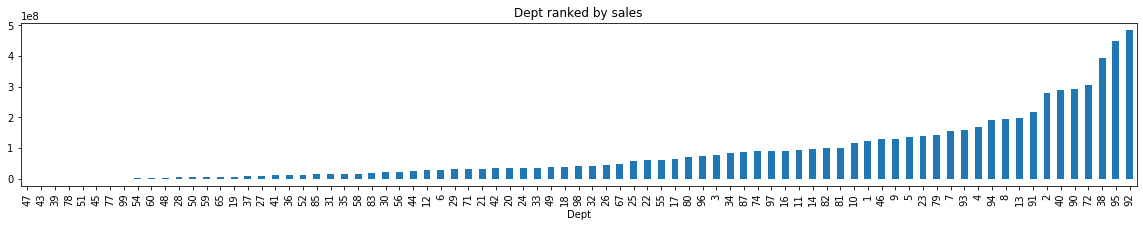

Dept
47    -4962.93
43       14.32
39      177.98
78     1714.71
51    30572.83
Name: Weekly_Sales, dtype: float64

In [14]:
plt.figure(figsize=(20,3))
sales_by_dept = df.groupby("Dept")['Weekly_Sales'].sum().sort_values()
sales_by_dept.plot(kind='bar')
plt.title('Dept ranked by sales')
plt.show()
sales_by_dept.head()

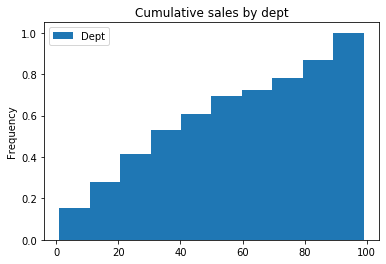

In [93]:
df.plot(y="Dept", kind='hist', cumulative=True, normed=True)
plt.title('Cumulative sales by dept')
plt.show()